In [ ]:
import os

import pymongo as pm
import pandas as pd

from dotenv import load_dotenv

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
load_dotenv()
PASSWORD = os.getenv("PASSWORD")
IP = os.getenv("IP")
PORT = os.getenv("PORT")

In [3]:
client = pm.MongoClient(f"mongodb://yosesotomayor:{PASSWORD}@{IP}:{PORT}/admin?authMechanism=SCRAM-SHA-256")
dblist = client.list_database_names()
print(dblist)

['admin', 'config', 'databases_ml', 'local']


In [4]:
db = client["databases_ml"]
print(db.list_collection_names())

['iris']


In [5]:
collection = db["iris"]

In [7]:
doc = collection.find_one()

print(doc)

{'_id': 1, 'SepalLengthCm': 5.1, 'SepalWidthCm': 3.5, 'PetalLengthCm': 1.4, 'PetalWidthCm': 0.2, 'Species': 'Iris-setosa'}


In [16]:
query = {'PetalWidthCm': 0.1} # Buscando documentos con PetalWidthCm exactamente igual a 0.1
projection = {'_id': 0, 'SepalLengthCm': 0, 'SepalWidthCm': 0}
for doc in collection.find(query, projection):
    print(doc)

{'PetalLengthCm': 1.5, 'PetalWidthCm': 0.1, 'Species': 'Iris-setosa'}
{'PetalLengthCm': 1.4, 'PetalWidthCm': 0.1, 'Species': 'Iris-setosa'}
{'PetalLengthCm': 1.1, 'PetalWidthCm': 0.1, 'Species': 'Iris-setosa'}
{'PetalLengthCm': 1.5, 'PetalWidthCm': 0.1, 'Species': 'Iris-setosa'}
{'PetalLengthCm': 1.5, 'PetalWidthCm': 0.1, 'Species': 'Iris-setosa'}
{'PetalLengthCm': 1.5, 'PetalWidthCm': 0.1, 'Species': 'Iris-setosa'}


In [ ]:
query = {'SepalWidthCm': {'$lt': 2.5}}
projection = {'_id': 0, 'SepalLengthCm': 1, 'SepalWidthCm': 1}
for doc in collection.find(query, projection):
    print(doc)

{'SepalLengthCm': 4.5, 'SepalWidthCm': 2.3}
{'SepalLengthCm': 5.5, 'SepalWidthCm': 2.3}
{'SepalLengthCm': 4.9, 'SepalWidthCm': 2.4}
{'SepalLengthCm': 5.0, 'SepalWidthCm': 2.0}
{'SepalLengthCm': 6.0, 'SepalWidthCm': 2.2}
{'SepalLengthCm': 6.2, 'SepalWidthCm': 2.2}
{'SepalLengthCm': 5.5, 'SepalWidthCm': 2.4}
{'SepalLengthCm': 5.5, 'SepalWidthCm': 2.4}
{'SepalLengthCm': 6.3, 'SepalWidthCm': 2.3}
{'SepalLengthCm': 5.0, 'SepalWidthCm': 2.3}
{'SepalLengthCm': 6.0, 'SepalWidthCm': 2.2}


In [17]:
query = { "Species": "Iris-versicolor"}
docs = collection.find(query).sort('SepalLengthCm', 1).limit(10)

for d in docs:
  print(d)

{'_id': 58, 'SepalLengthCm': 4.9, 'SepalWidthCm': 2.4, 'PetalLengthCm': 3.3, 'PetalWidthCm': 1.0, 'Species': 'Iris-versicolor'}
{'_id': 94, 'SepalLengthCm': 5.0, 'SepalWidthCm': 2.3, 'PetalLengthCm': 3.3, 'PetalWidthCm': 1.0, 'Species': 'Iris-versicolor'}
{'_id': 61, 'SepalLengthCm': 5.0, 'SepalWidthCm': 2.0, 'PetalLengthCm': 3.5, 'PetalWidthCm': 1.0, 'Species': 'Iris-versicolor'}
{'_id': 99, 'SepalLengthCm': 5.1, 'SepalWidthCm': 2.5, 'PetalLengthCm': 3.0, 'PetalWidthCm': 1.1, 'Species': 'Iris-versicolor'}
{'_id': 60, 'SepalLengthCm': 5.2, 'SepalWidthCm': 2.7, 'PetalLengthCm': 3.9, 'PetalWidthCm': 1.4, 'Species': 'Iris-versicolor'}
{'_id': 85, 'SepalLengthCm': 5.4, 'SepalWidthCm': 3.0, 'PetalLengthCm': 4.5, 'PetalWidthCm': 1.5, 'Species': 'Iris-versicolor'}
{'_id': 90, 'SepalLengthCm': 5.5, 'SepalWidthCm': 2.5, 'PetalLengthCm': 4.0, 'PetalWidthCm': 1.3, 'Species': 'Iris-versicolor'}
{'_id': 81, 'SepalLengthCm': 5.5, 'SepalWidthCm': 2.4, 'PetalLengthCm': 3.8, 'PetalWidthCm': 1.1, 'Speci

In [18]:
cursor = collection.find()
print(cursor)
print('Type of cursor:',type(cursor))

Type of cursor: <class 'pymongo.synchronous.cursor.Cursor'>


In [20]:
list_cursor = list(cursor)
print(list_cursor[:5])

[{'_id': 1, 'SepalLengthCm': 5.1, 'SepalWidthCm': 3.5, 'PetalLengthCm': 1.4, 'PetalWidthCm': 0.2, 'Species': 'Iris-setosa'}, {'_id': 2, 'SepalLengthCm': 4.9, 'SepalWidthCm': 3.0, 'PetalLengthCm': 1.4, 'PetalWidthCm': 0.2, 'Species': 'Iris-setosa'}, {'_id': 3, 'SepalLengthCm': 4.7, 'SepalWidthCm': 3.2, 'PetalLengthCm': 1.3, 'PetalWidthCm': 0.2, 'Species': 'Iris-setosa'}, {'_id': 4, 'SepalLengthCm': 4.6, 'SepalWidthCm': 3.1, 'PetalLengthCm': 1.5, 'PetalWidthCm': 0.2, 'Species': 'Iris-setosa'}, {'_id': 5, 'SepalLengthCm': 5.0, 'SepalWidthCm': 3.6, 'PetalLengthCm': 1.4, 'PetalWidthCm': 0.2, 'Species': 'Iris-setosa'}]


In [21]:
df = pd.DataFrame(list_cursor)
print('Type of df:', type(df))

Type of df: <class 'pandas.core.frame.DataFrame'>


In [22]:
df

,_id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [25]:
# Tomamos todas las variables excepto '_id' y 'Species' como variables independiente
X = df.drop(['_id', 'Species'], axis = 1)

# Tomamos solo a la variable 'Species' como variable dependiente
y = df['Species']

# Usamos sklearn para dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [27]:
from sklearn import tree
from matplotlib import pyplot as plt

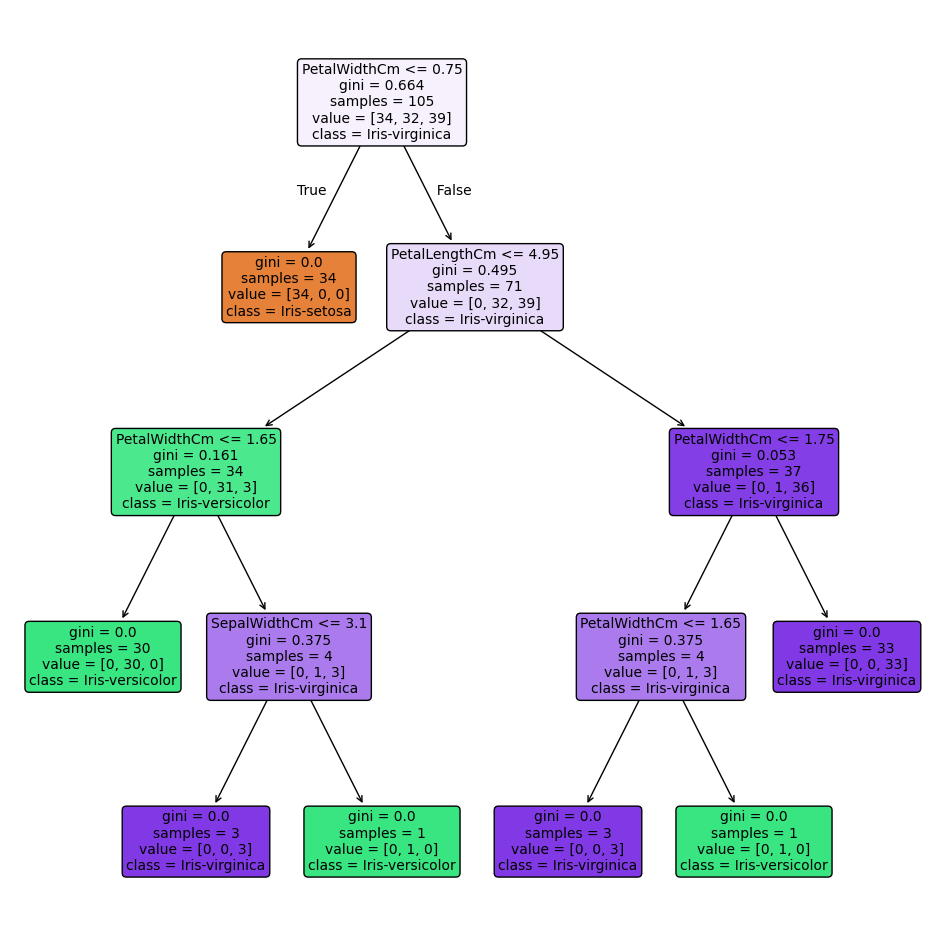

In [28]:
plt.figure(figsize=(12,12))
tree.plot_tree(clf, feature_names=list(clf.feature_names_in_), class_names=list(clf.classes_),
               fontsize=10, filled=True, rounded=True)
plt.show()

In [29]:
y_predict = clf.predict(X_test) # Probamos modelo con conjunto de prueba

Confusion Matrix : 
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Test accuracy =  0.9777777777777777


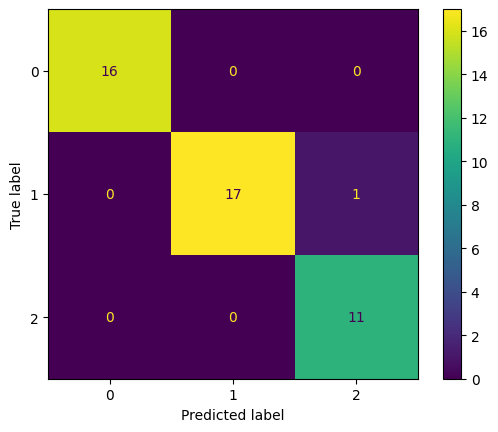

In [31]:
from sklearn.metrics import (confusion_matrix,
                           accuracy_score)
from sklearn.metrics import ConfusionMatrixDisplay

# confusion matrix
cm = confusion_matrix(y_test, y_predict)
print ("Confusion Matrix : \n", cm)

# Exactitud de modelo
print('Test accuracy = ', accuracy_score(y_test, y_predict))
ConfusionMatrixDisplay(cm).plot()

In [32]:
# Simulamos recolección de nuevas observaciones no clasificadas
docs = [{ '_id': 151, 'SepalLengthCm': 5.0, 'SepalWidthCm': 3.2, 'PetalLengthCm': 1.6, 'PetalWidthCm': 0.2},
        {'_id': 152, 'SepalLengthCm': 5.1, 'SepalWidthCm': 3.1, 'PetalLengthCm': 1.9, 'PetalWidthCm': 0.1},
        {'_id': 153, 'SepalLengthCm': 7, 'SepalWidthCm': 3.2, 'PetalLengthCm': 4.7, 'PetalWidthCm': 1.4}]
result = collection.insert_many(docs)
print("Inserted Ids: ", result.inserted_ids)

Inserted Ids:  [151, 152, 153]


In [33]:
query = {'Species': {'$exists': False}}
docs = collection.find(query)
df = pd.DataFrame(list(docs))
# Seleccionando solo atributos usados para entrenar el modelo
X = df.drop(['_id'], axis=1)
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.0,3.2,1.6,0.2
1,5.1,3.1,1.9,0.1
2,7.0,3.2,4.7,1.4


In [34]:
y_predict = clf.predict(X)
print(y_predict)

['Iris-setosa' 'Iris-setosa' 'Iris-versicolor']


In [35]:
# Agregamos columna con predicciones al DataFrame original
df['Species'] = y_predict
df.head()

,_id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,151,5.0,3.2,1.6,0.2,Iris-setosa
1,152,5.1,3.1,1.9,0.1,Iris-setosa
2,153,7.0,3.2,4.7,1.4,Iris-versicolor


In [36]:
for s in df['Species'].unique(): # Por cada posible clasificacion
    rows = df.loc[df['Species'] == s] # Seleccionamos filas con dicha clasificacion
    filter_query = {'_id': {'$in': rows['_id'].to_list()}} # Generamos filtro para todas las _id de la seleccion
    update_query = {'$set': {'Species': s}} # Agregamos campo 'Species' con el valor correspondiente
    result = collection.update_many(filter_query, update_query) # Actualizamos documentos en la coleccion
    print('Updated', result.modified_count, 'documents with Species', s)

Updated 2 documents with Species Iris-setosa
Updated 1 documents with Species Iris-versicolor


In [37]:
client.close()